In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\oil_prediction_final.csv')
df.head()

,Unnamed: 0,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx,oil_return
0,0,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42,-0.007825
1,1,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11,-0.036917
2,2,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45,0.005647
3,3,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47,0.000000
4,4,2000-01-10,24.71,65.595398,58.127548,72.726173,44.18,0.011190,1457.60,-0.003238


In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.head()

,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx,oil_return
0,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42,-0.007825
1,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11,-0.036917
2,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45,0.005647
3,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47,0.000000
4,2000-01-10,24.71,65.595398,58.127548,72.726173,44.18,0.011190,1457.60,-0.003238


In [6]:
df=df.drop(['date'],axis=1)

In [7]:
df1=df.drop(['oil_return','value'],axis=1)
df1.head()

,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx
0,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42
1,47.565075,47.418663,56.502644,123.22,0.001922,1402.11
2,52.012840,51.852737,59.469170,53.61,0.000956,1403.45
3,41.667515,41.539261,54.446617,42.03,0.027090,1441.47
4,65.595398,58.127548,72.726173,44.18,0.011190,1457.60


In [8]:
####divide into high medium low group
def discretize_feature(series):
    return pd.qcut(series, q=3, labels=[0, 1, 2])

In [9]:
df1_discretize= df1.apply(discretize_feature)

In [10]:
df1_encoded = pd.get_dummies(df1_discretize, prefix=df1.columns)

In [25]:
frequent_itemsets = apriori(df1_encoded, min_support=0.05, use_colnames=True)

In [12]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(GPRD_THREAT_0),(GPRD_0),0.333444,0.333777,0.248628,0.745636,2.233936,0.137332,2.619172,0.828677
1,(GPRD_0),(GPRD_THREAT_0),0.333777,0.333444,0.248628,0.744893,2.233936,0.137332,2.612847,0.829091
2,(GPRD_ACT_2),(GPRD_2),0.333444,0.333444,0.242475,0.727182,2.180821,0.131290,2.443226,0.812321
3,(GPRD_2),(GPRD_ACT_2),0.333444,0.333444,0.242475,0.727182,2.180821,0.131290,2.443226,0.812321
4,(GPRD_THREAT_2),(GPRD_2),0.333278,0.333444,0.252453,0.757485,2.271699,0.141323,2.748514,0.839632
...,...,...,...,...,...,...,...,...,...,...
80,"(spindx_0, GPRD_THREAT_2)","(GPRD_ACT_2, GPRD_2)",0.103941,0.242475,0.085149,0.819200,3.378498,0.059946,4.189853,0.785675
81,"(spindx_2, GPRD_THREAT_2, GPRD_ACT_2)",(GPRD_2),0.052553,0.333444,0.051389,0.977848,2.932569,0.033865,30.090233,0.695555
82,"(spindx_2, GPRD_ACT_2, GPRD_2)",(GPRD_THREAT_2),0.062032,0.333278,0.051389,0.828418,2.485668,0.030715,3.885740,0.637222
83,"(sprtrn_0, spindx_0, GPRD_ACT_2)",(GPRD_2),0.064693,0.333444,0.050058,0.773779,2.320565,0.028487,2.946480,0.608432


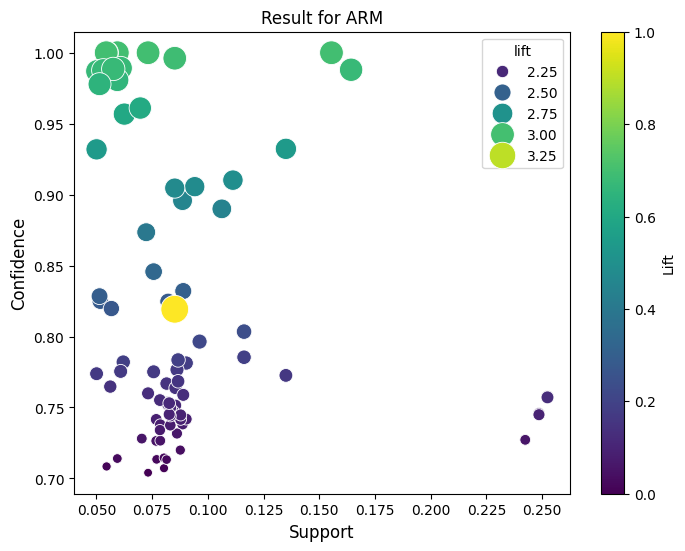

In [13]:
plt.figure(figsize=(8, 6))
scatter=sns.scatterplot(x='support', y='confidence', size='lift', data=rules, hue='lift', palette='viridis', sizes=(40, 400))
plt.colorbar(scatter.collections[0], label='Lift')
plt.title('Result for ARM',fontsize=12)
plt.xlabel('Support', fontsize=12)
plt.ylabel('Confidence', fontsize=12)
plt.show()

In [14]:
df2=df1[['GPRD','daily_policy_index','sprtrn']]

In [15]:
df2.head()

,GPRD,daily_policy_index,sprtrn
0,93.751915,109.31,-0.038345
1,47.565075,123.22,0.001922
2,52.012840,53.61,0.000956
3,41.667515,42.03,0.027090
4,65.595398,44.18,0.011190


In [16]:
df2_discretize= df2.apply(discretize_feature)

In [21]:
df2_discretize.head()

,GPRD,daily_policy_index,sprtrn
0,1,1,0
1,0,2,1
2,0,0,1
3,0,0,2
4,0,0,2


In [28]:
df2_encoded = pd.get_dummies(df2_discretize, prefix=df2.columns)

In [23]:
df2_encoded.head()

,GPRD_0,GPRD_1,GPRD_2,daily_policy_index_0,daily_policy_index_1,daily_policy_index_2,sprtrn_0,sprtrn_1,sprtrn_2
0,False,True,False,False,True,False,True,False,False
1,True,False,False,False,False,True,False,True,False
2,True,False,False,True,False,False,False,True,False
3,True,False,False,True,False,False,False,False,True
4,True,False,False,True,False,False,False,False,True


In [29]:
frequent_itemsets2 = apriori(df2_encoded, min_support=0.05, use_colnames=True)

In [31]:
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.3)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(daily_policy_index_0),(GPRD_0),0.333278,0.333777,0.106270,0.318862,0.955316,-0.004971,0.978103,-0.065556
1,(GPRD_0),(daily_policy_index_0),0.333777,0.333278,0.106270,0.318386,0.955316,-0.004971,0.978152,-0.065602
2,(daily_policy_index_1),(GPRD_0),0.333444,0.333777,0.105771,0.317207,0.950357,-0.005525,0.975732,-0.072673
3,(GPRD_0),(daily_policy_index_1),0.333777,0.333444,0.105771,0.316891,0.950357,-0.005525,0.975768,-0.072706
4,(GPRD_0),(daily_policy_index_2),0.333777,0.333278,0.121736,0.364723,1.094352,0.010496,1.049499,0.129412
5,(daily_policy_index_2),(GPRD_0),0.333278,0.333777,0.121736,0.365269,1.094352,0.010496,1.049616,0.129316
6,(sprtrn_0),(GPRD_0),0.333278,0.333777,0.111924,0.335828,1.006146,0.000684,1.003089,0.009163
7,(GPRD_0),(sprtrn_0),0.333777,0.333278,0.111924,0.335326,1.006146,0.000684,1.003082,0.009169
8,(sprtrn_1),(GPRD_0),0.333278,0.333777,0.108265,0.324850,0.973256,-0.002975,0.986778,-0.039583
9,(GPRD_0),(sprtrn_1),0.333777,0.333278,0.108265,0.324365,0.973256,-0.002975,0.986808,-0.039612


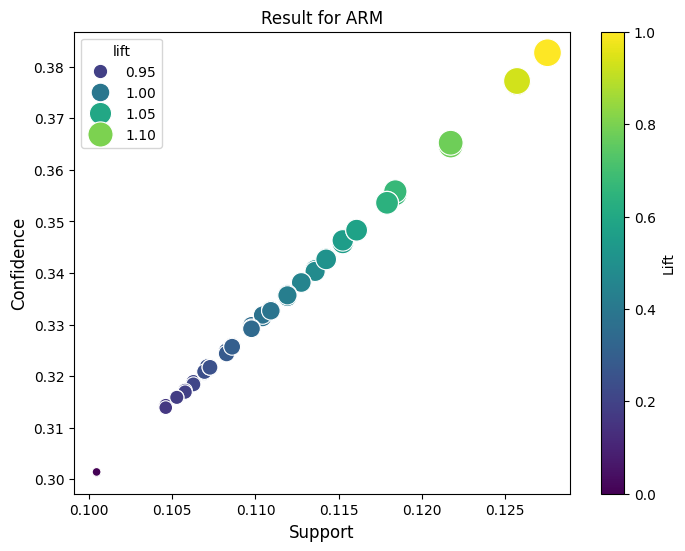

In [32]:
plt.figure(figsize=(8, 6))
scatter=sns.scatterplot(x='support', y='confidence', size='lift', data=rules2, hue='lift', palette='viridis', sizes=(40, 400))
plt.colorbar(scatter.collections[0], label='Lift')
plt.title('Result for ARM',fontsize=12)
plt.xlabel('Support', fontsize=12)
plt.ylabel('Confidence', fontsize=12)
plt.show()